# K-Means Clustering for Customer Segmentation

* Implemented K-Means Clustering from scratch on customer demographic data using NumPy and pandas, applying clustering for different values of K (2, 3, 4) based on Age, Annual Income, and Spending Score.

* Visualized clusters with Matplotlib and interpreted customer segments to suggest data-driven marketing strategies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Step 2: Preprocess the data
# Encode categorical variable 'Gender'
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [3]:
# Step 3: Choose appropriate features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Step 4: Try different K values
k_values = [2, 3, 4]


In [4]:
for k in k_values:

    # Step 5: Perform K-means clustering on the selected features
    # Initialize centroids
    centroids = X.sample(k, random_state=42).values

    # Ensure centroids array has correct shape
    if centroids.ndim == 1:
        centroids = centroids.reshape(-1, 1)

    # Implement K-means
    max_iter = 100
    for _ in range(max_iter):
        # Assign points to nearest centroid
        distances = np.sqrt(((X.values - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([X.values[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

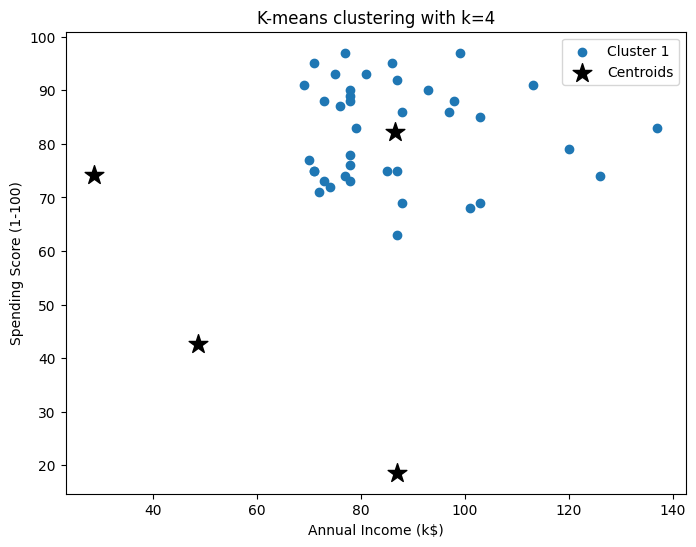

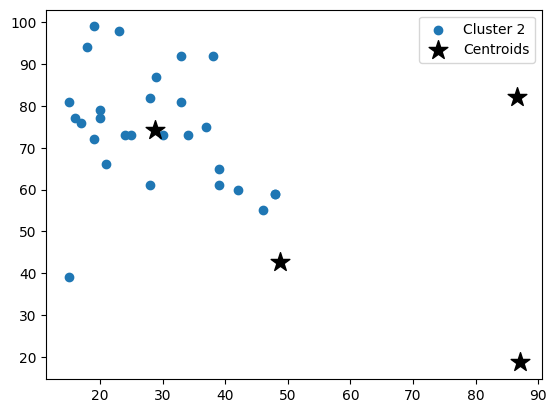

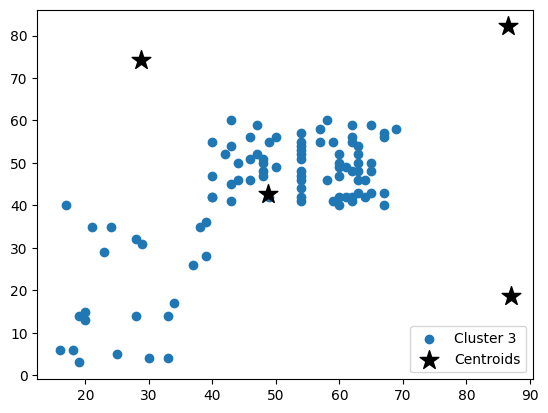

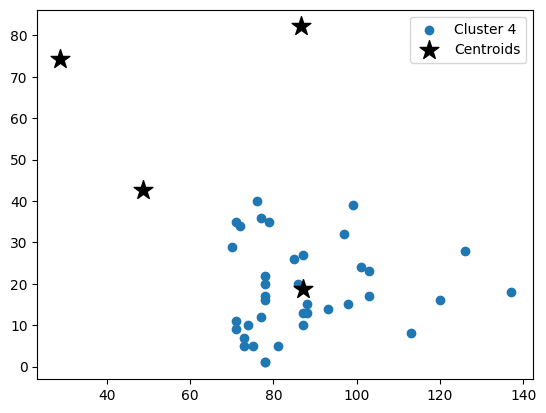

Recommendations for k=4:
Cluster 1:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   39.000000  39.000000  39.000000           39.000000   
mean   162.000000   0.538462  32.692308           86.538462   
std     22.803509   0.505035   3.728650           16.312485   
min    124.000000   0.000000  27.000000           69.000000   
25%    143.000000   0.000000  30.000000           75.500000   
50%    162.000000   1.000000  32.000000           79.000000   
75%    181.000000   1.000000  35.500000           95.000000   
max    200.000000   1.000000  40.000000          137.000000   

       Spending Score (1-100)  
count               39.000000  
mean                82.128205  
std                  9.364489  
min                 63.000000  
25%                 74.500000  
50%                 83.000000  
75%                 90.000000  
max                 97.000000  


Cluster 2:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   28.000000  28.000000  28

In [7]:
# Step 6: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.title(f'K-means clustering with k={k}')
plt.xlabel(features[1])
plt.ylabel(features[2])
for i in range(k):
    plt.scatter(X.values[labels == i, 1], X.values[labels == i, 2], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 1], centroids[:, 2], marker='*', s=200, c='black', label='Centroids')
    plt.legend()
    plt.show()
# Step 7: Interpret the results and provide recommendations for marketing strategies
print(f'Recommendations for k={k}:')
for i in range(k):
    cluster_data = data.iloc[labels == i]
    print(f'Cluster {i+1}:')
    print(cluster_data.describe())
    print('\n')